Machine Learning in a Nutshell
===
So far, we have seen what we can do with machine learning, i.e. segment images, classify them, or even generate new images. All this problems had one core aspect in common:
> We want to **learn** some function $f$ that maps an input $x$ to an output $y$.

This section explains this idea of "learning a function" in more detail with some examples for illustration.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from plot import *

A First Experiment
---
We start with a simple example: Below we have a function $f(x)=y$ that maps an input $x$ to an output $y$. For a moment, we assume that we do not know this function $f$. All we know is that $f$ is an affine linear function, i.e. it has the form $f(x) = a \cdot x + b$ and we have an image of the function given in the plot below.

Our task is to **learn** the parameters $a$ and $b$ of this function. This means we define another function, which we call `function_to_learn`, which has the same form as $f$ but with unknown parameters $a$ and $b$. We then compare the output of `function_to_learn` to the output of $f$ in the plot below. The goal is to find the parameters $a$ and $b$ so that the output of `function_to_learn` matches the output of $f$ as closely as possible.


Task
===
Try to choose a good pair of parameters $a$ and $b$ so that the output of `function_to_learn` matches the unknown target function $f$ in blue in the plot below.


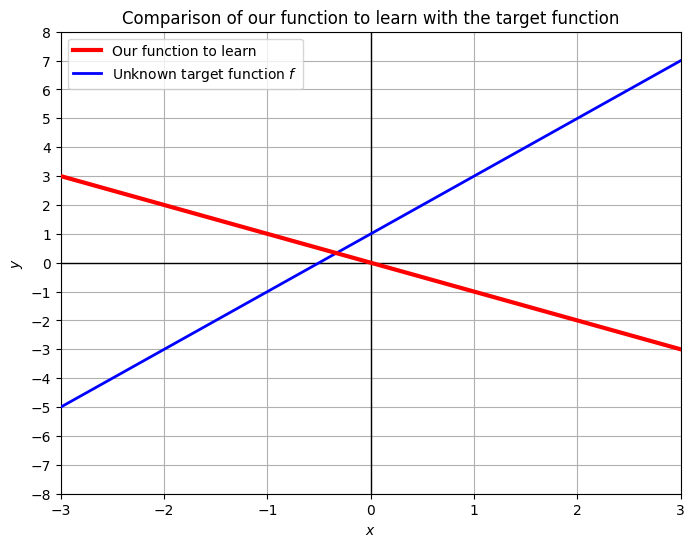

In [16]:
a = -1.0
b = 0.0
function_to_learn = lambda x: a*x + b
compare_to_target(function_to_learn, type='function')

However, in practice, we do not know the full image of the function $f$. Instead, we only have a few data points $(x_i, y_i)$ that we can use to learn the parameters $a$ and $b$. These data points are called **training data**. In the plot below, we revisit the same problem but now we only have three data points $(x_1, y_1)$, $(x_2, y_2)$ and $(x_3, y_3)$ that we can use to learn the parameters $a$ and $b$.

Task
===
Try to choose a good pair of parameters $a$ and $b$ so that the output of `function_to_learn` fits the data points $(x_i, y_i)$ as closely as possible. You can do this by changing the values of $a$ and $b$ in the code below.


In [24]:
# Here we store all your guesses for the parameters a and b in order to make some visualization later on.
sequence = []

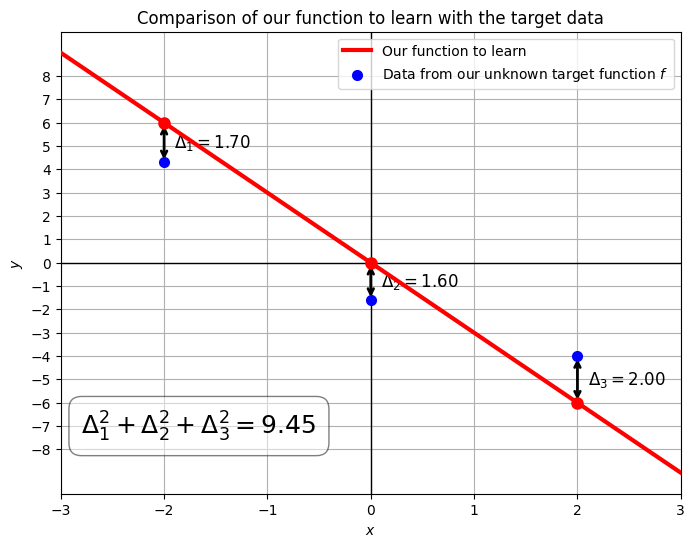

In [27]:
a = -3
b = 0
function_to_learn = lambda x: a*x + b
compare_to_target(function_to_learn, type='data')
sequence += [(a,b)]

What is the Problem?
===
No matter how we choose the parameters $a$ and $b$, the output of `function_to_learn` will never match the data points $(x_i, y_i)$ exactly. There might be two reasons for this:
- The function $f$ is not affine linear, i.e. it does not have the form $f(x) = a \cdot x + b$. In this case, we need to choose a different function to learn, e.g. a polynomial function or a **neural network**.
- The data points are contaminated by noise (which is often the case in practice). This means that the data points $(x_i, y_i)$ are not exactly on the function $f$, but rather close to it. In this case, we need to find a way to minimize the difference between the output of `function_to_learn` and the data points $(x_i, y_i)$.

This leads to a general procedure for a machine learning problem:
1. **Define a function to learn**: Here, we choose what shape our function should have. In the examples above, we chose an affine linear function $f(x) = a \cdot x + b$.
2. **Learn the parameters of the function**: This is done by solving an optimization problem. The task is to find the "best" parameters of our function to learn so that the output of the function fits the data points as closely as possible. In the following, we will illustrate this four the example of an affine linear function.

In the example above, our training data consists of three data points:
- $(x_1, y_1) = (-2, 4.3)$
- $(x_2, y_2) = (0, -1.6)$
- $(x_3, y_3) = (2, -4)$

We want to find $a$ and $b$ such that the output of `function_to_learn` matches these data points as closely as possible. To do this, we define a **loss function** that measures the difference between the output of `function_to_learn` and the data points $(x_i, y_i)$. The loss function is defined as follows:
$$
\text{loss}(a, b) = |\textcolor{red}{a \cdot x_1 + b} - y_1|^2 + |\textcolor{red}{a \cdot x_2 + b} - y_2|^2 + |\textcolor{red}{a \cdot x_3 + b} - y_3|^2
$$

Note that taking the square just helps us for the computations later on.

The Problem
===
Now that we defined our $\text{loss}$, we can formulate our optimization problem:
>Find the parameters $a, b \in \mathbb{R}$ such that the loss function $\text{loss}(a, b)$ takes its minimum value.

To illustrate what we are searching for, we plot the loss function in the following figure below.

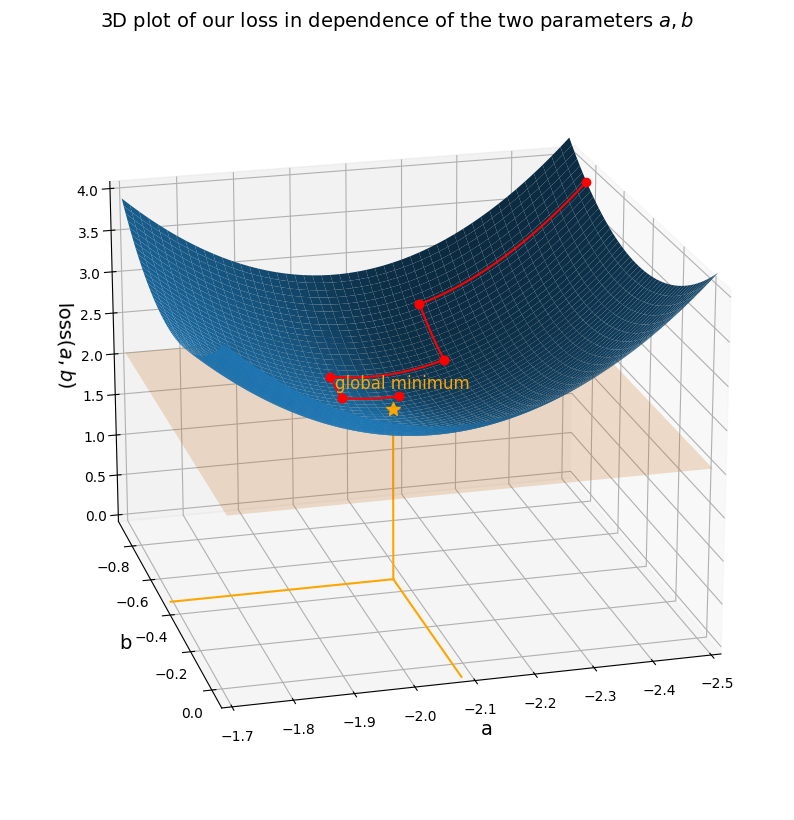

In [29]:
loss = lambda a, b: (a * -2 + b - 4.3)**2 + (a * 0 + b + 1.6)**2 + (a * 2 + b + 4)**2

# Example of a sequence of guesses
# sequence = [(-2.5, -0.8), (-2.2, -0.8), (-2.2, -0.6), (-2.0, -0.6), (-2.0, -0.5), (-2.1, -0.5)]

plot_loss_landscape(loss, sequence, (-2.5, -1.7), (-0.93,0.07))

Doing Better - Optimization and Gradient Descent
===
In the previous plot, we have seen how our "algorithm" of manually changing our parameters $a,b$ can be visualised. All our changes are leading to a path in the loss landscape, aiming to arrive at the minimum loss value. Imagine a hiker standing on a plateau at a mountain who wants to reach the valley. In analgy to our previous strategy, the hiker would be half-blinded making his way hoping to go the right direction. We want to do better!

But for a moment, to illustrate concepts and keep things simple, we will consider an even simpler model. Namely that our function is
$$
f(x) = a \cdot x
$$
and hence our loss only depends on the parameter $a$:
$$
\text{loss}(a) = (\textcolor{red}{a \cdot x_1} - y_1)^2 + (\textcolor{red}{a \cdot x_2} - y_2)^2 + (\textcolor{red}{a \cdot x_3} - y_3)^2
$$

We will now present an algorithm to get the best parameter $a$ which minimises our loss.

Step 1
---
We need to choose an initial guess for our parameter, let's say we choose $a=-1.0$:

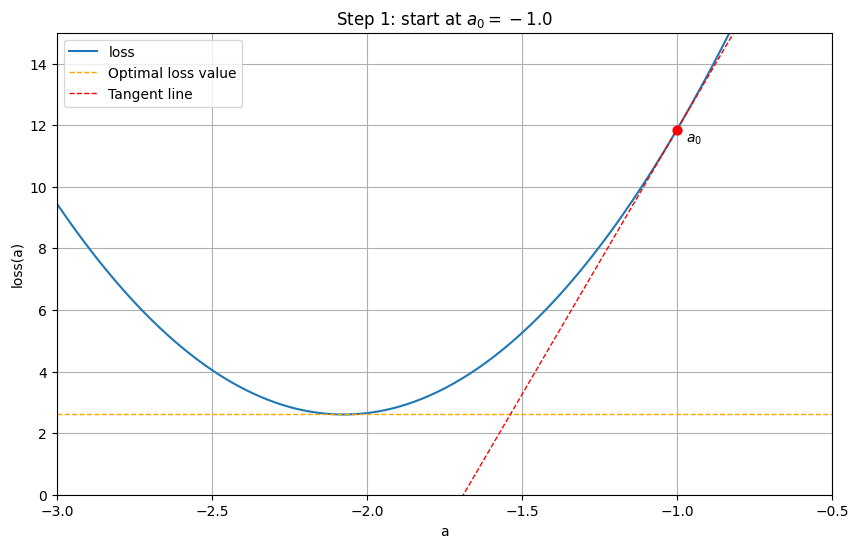

In [6]:
loss = lambda a: (a * -2 - 4.3)**2 + (a * 0 + 1.6)**2 + (a * 2 + 4)**2

a0 = -1.0
plot_loss_point(loss, -1.0)

Step 2
---
Now we need to decide in which direction to go. For a moment, imagine we would only know our initial guess and the red tangent line. How would you decide in which direction, either left or right, to go?

Task
===
Try to find a good `step_size` such that a minimal amount of steps is needed to be close to the best possible parameter $a^*$.

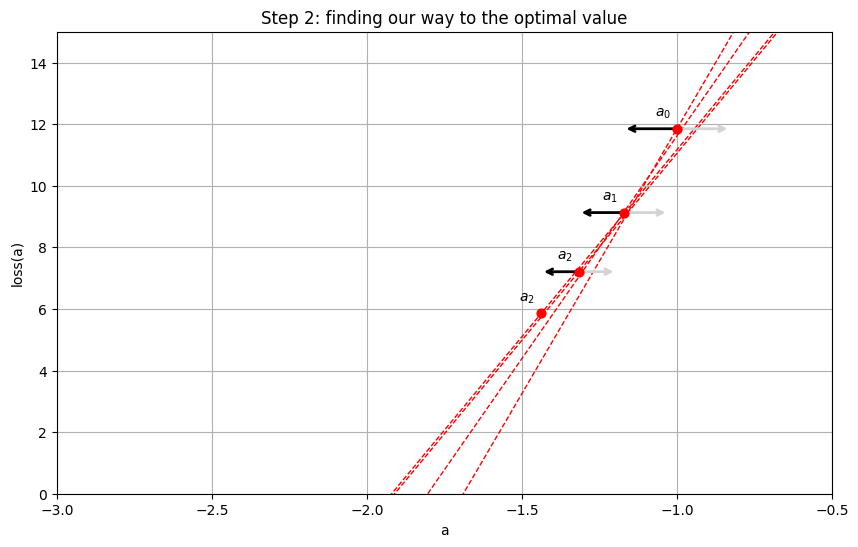

In [7]:
a0 = -1.0

step_size = 0.01
max_no_steps = 3
plot_tangents(loss, a0, step=step_size, no_steps=max_no_steps, plot_loss=False)

Mixin in Neural Networks
===
In the previous problems, we wanted to fit some *predefined* parameters of a function to a target object, which was in our case either the graph of another function or the more realistic scenario of some noisy data points. Our *predefined* function was an affine linear function of the form $f(x)=a \cdot x + b$ where we wanted to set the parameters $a,b \in \mathbb R$ in a meaningful way, and then an even simpler linear function $f(x)=a \cdot x$ where we have only one parameter $a \in \mathbb R$ to guess.

The Structure of a Neural Network
---
Neural networks are also just functions with some predefined parameters which we can guess. Indeed, they are built upon linear affine functions. The idea is to take the previous structure and wrap everything inside another function, called the *activation function* $\sigma(t)$. For oour purposes, two activation functions are interesting:
- The so-called ReLU (rectified linear unit) function
$$
\text{ReLU}(t) = \max(t,0) = \begin{cases}
t, & \text{ for } t \geq 0, \\
0, & \text{ for } t < 0.
\end{cases}
$$
- The sigmoid function
$$
\sigma(t) = \frac{1}{1+e^{-t}}.
$$

For example, a one-layer neural network with the ReLU activation function is then a concatenation of an affine-linear function with the ReLU activation function:
$$
f(x) = \text{ReLU}(a \cdot x + b).
$$

Even though the structure is now more complicated, we still have the same two parameters $a,b \in \mathbb R$ to guess as before!

An important point why we are making everything more complicated at first sight:
> It can be shown mathematically that deep neural networks composed like this are able to represent a lot of functions which are practically relevant.

Consider all the various examples in the 'introduction.ipynb' notebook. This are all such kind of functions which can be represented by neural networks!

The Meaning of Deep
---
Before, we defined "one-layer" neural networks. We can add more layers - or, speaking in machine learning jargon, making them deeper!

For example, consider a two-layer neural network with the ReLU activation function:
$$
f(x) = \textcolor{red}{\text{ReLU}(a_2 \cdot } \textcolor{blue}{\text{ReLU}(a_1 \cdot x + b_1)} \textcolor{red}{ + a_2)}
$$
The blue part is exactly our one-layer network from before. We just renamed the parameters to $a_1, b_1 \in \mathbb R$ to indicate the number of the layer in the index. Namely, it is the first layer. If we have an input $x \in \mathbb R$, then we first compute the blue part, and then afterwards, the red part - which is our second layer.

We can also define more layers. This is done in practice although notation gets cumbersome then. For example, a three-layer network looks like
For example, consider a two-layer neural network with the ReLU activation function:
$$
f(x) = 
\textcolor{green}{\text{ReLU}(a_3 \cdot }
\textcolor{red}{\text{ReLU}(a_2 \cdot } 
\textcolor{blue}{\text{ReLU}(a_1 \cdot x + b_1)} \textcolor{red}{ + a_2)}
 \textcolor{green}{ + a_3)}
$$

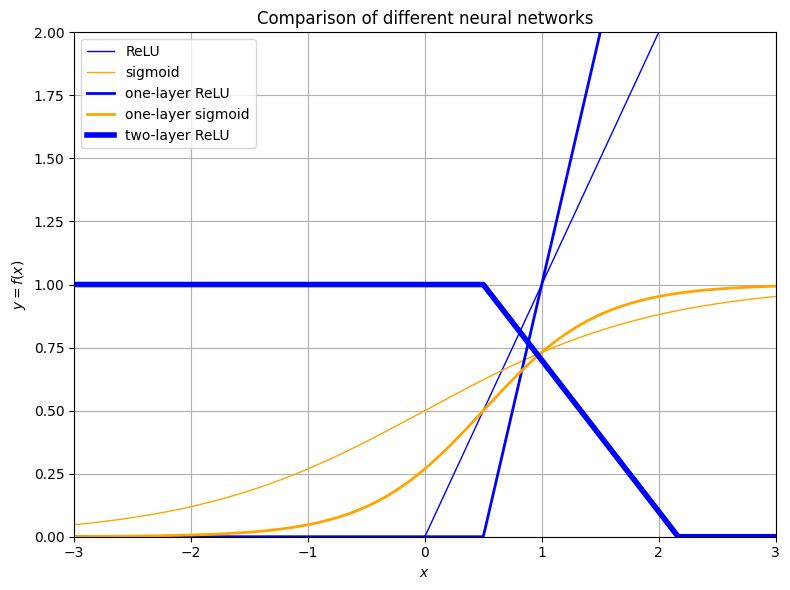

In [8]:
a = 2.0
b = -1.0

relu = lambda t: np.maximum(t, 0)
sigmoid = lambda t: 1 / (1 + np.exp(-t))
one_layer_relu = lambda x: relu(a * x + b)
one_layer_sigmoid = lambda x: sigmoid(a * x + b)
two_layer_relu = lambda x: relu(-0.3 * relu(a * x + b) + 1.0)

plot_activations(
    x_range=(-3, 3),
    functions=[
        relu,
        sigmoid,
        one_layer_relu,
        one_layer_sigmoid,
        two_layer_relu
    ],
    labels=["ReLU", "sigmoid", "one-layer ReLU", "one-layer sigmoid", "two-layer ReLU"],
    colors=["blue", "orange", "blue", "orange", "blue"],
    linewidths=[1, 1, 2, 2, 4],
    title="Comparison of different neural networks"
)

Increasing the Dimensionality
===
So far, we considered our input $x \in \mathbb R$ to be a one-dimensional real-valued number. However, if we consider images as in 'introduction.ipynb', our input is not a single number, but a high-dimensional vector!
Everything so far can be generalized to this case. We want to illustrate how a 2D ReLu network, mapping a 2D vector $x \in \mathbb R^2$ to a real-valued number $y \in \mathbb R$, might look like.

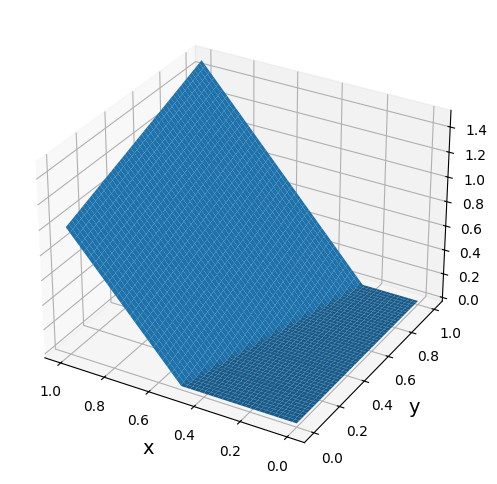

In [9]:
a, b = 2.0, .5
c = -1.0

one_layer_relu_2d = lambda x, y: relu(a * x + b * y + c)

plot_2d_function(one_layer_relu_2d, (0,1), (0,1))